In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import backend as k

#import keras_tuner as kt


In [2]:
# file_path = 'BankRecords.csv'
# data = pd.read_csv(file_path)


In [3]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Read the CSV file into a DataFrame
data = pd.read_csv(filename)

# Display the first few rows of the DataFrame
print(data.head())


Saving BankRecords (1).csv to BankRecords (1) (1).csv
   ID  Age  Experience(Years)  Income(Thousands's)  Sort Code  Family  \
0   1   25                  1                   49      91107       4   
1   2   45                 19                   34      90089       3   
2   3   39                 15                   11      94720       1   
3   4   35                  9                  100      94112       1   
4   5   35                  8                   45      91330       4   

   Credit Score Education  Mortgage(Thousands's) Personal Loan  \
0           1.6   Diploma                      0            No   
1           1.5   Diploma                      0            No   
2           1.0   Diploma                      0            No   
3           2.7    Degree                      0            No   
4           1.0    Degree                      0            No   

  Securities Account CD Account Online Banking CreditCard  
0                Yes         No             No    

In [23]:
data.head()

,Age,Experience(Years),Income,Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [30]:
y.describe()

count    5000.000000
mean       73.774200
std        46.033729
min         8.000000
25%        39.000000
50%        64.000000
75%        98.000000
max       224.000000
Name: Income, dtype: float64

In [5]:
# Drop the ID column and rename Income column for convenience
data = data.drop('ID', axis=1)
data = data.rename(columns={'Income(Thousands\'s)': 'Income'})



In [6]:
# Separate features and target variable
X = data.drop('Income', axis=1)
y = data['Income']



In [7]:
# Define categorical and numerical columns
categorical_cols = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
numerical_cols = X.columns.difference(categorical_cols)



In [8]:
# Preprocessing pipeline for numerical data
numerical_transformer = StandardScaler()

# Preprocessing pipeline for categorical data
categorical_transformer = OneHotEncoder(drop='first')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



In [9]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)



In [37]:
# Define the Keras Sequential model with tuned hyperparameters
model = Sequential()
model.add(Dense(150, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model with a tuned optimizer
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [38]:
# Train the model with a different batch size and more epochs
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

print(f"Test Loss: {loss}")

Epoch 1/100
223/223 [==============================] - 3s 8ms/step - loss: 3159.3296 - val_loss: 1071.6963
Epoch 2/100
223/223 [==============================] - 1s 5ms/step - loss: 1058.3289 - val_loss: 930.5434
Epoch 3/100
223/223 [==============================] - 1s 5ms/step - loss: 950.8929 - val_loss: 882.3490
Epoch 4/100
223/223 [==============================] - 1s 5ms/step - loss: 902.1044 - val_loss: 852.8855
Epoch 5/100
223/223 [==============================] - 1s 4ms/step - loss: 876.2387 - val_loss: 830.6617
Epoch 6/100
223/223 [==============================] - 1s 5ms/step - loss: 859.1693 - val_loss: 836.9774
Epoch 7/100
223/223 [==============================] - 1s 3ms/step - loss: 848.3839 - val_loss: 806.7732
Epoch 8/100
223/223 [==============================] - 1s 3ms/step - loss: 837.5609 - val_loss: 806.3448
Epoch 9/100
223/223 [==============================] - 1s 3ms/step - loss: 831.5630 - val_loss: 797.9922
Epoch 10/100
223/223 [==============================

In [12]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse}')
print(f'Test RMSE: {rmse}')
print(f'Test R²: {r2}')

32/32 [==============================] - 0s 2ms/step
Test MSE: 686.9208960534806
Test RMSE: 26.209175798820546
Test R²: 0.6760603075032516


In [13]:
# New customer details
new_customer = {
    'Age': 30,
    'Experience(Years)': 5,
    'Sort Code': 92011,
    'Family': 2,
    'Credit Score': 1.2,
    'Mortgage(Thousands\'s)': 20,
    'Education': 'Degree',
    'Personal Loan': 'No',
    'Securities Account': 'Yes',
    'CD Account': 'No',
    'Online Banking': 'Yes',
    'CreditCard': 'No'
}


# Convert to DataFrame
new_customer_df = pd.DataFrame([new_customer])

# Apply the same preprocessing to the new customer data
new_customer_preprocessed = preprocessor.transform(new_customer_df)

# Predict income using the MLP model
new_customer_income_prediction = model.predict(new_customer_preprocessed)

new_customer_income_prediction[0]





1/1 [==============================] - 0s 24ms/step


array([43.880867], dtype=float32)

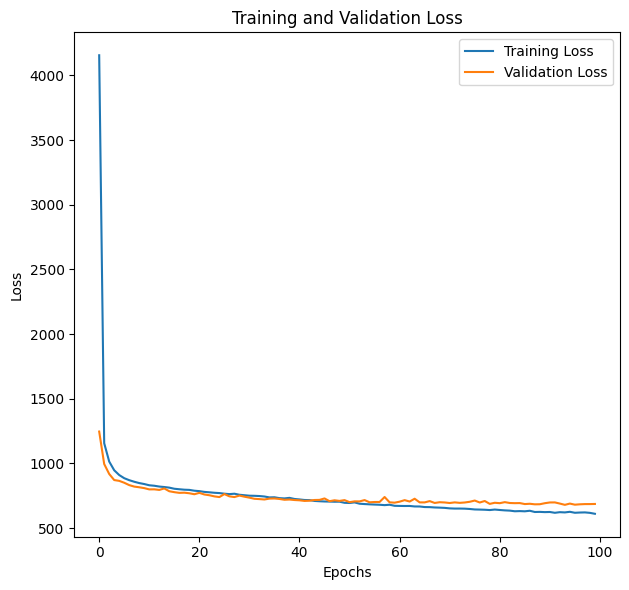

In [16]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()


plt.tight_layout()
plt.show()

In [31]:
# Baseline model MSE
mean_income = np.mean(y_train)
baseline_pred = np.full_like(y_test, mean_income)
baseline_mse = mean_squared_error(y_test, baseline_pred)

print(f"Baseline MSE: {baseline_mse}")

Baseline MSE: 2120.572
